Shape of the image: (512, 512).


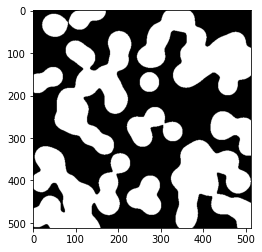

In [21]:
import numpy as np
import skimage
import matplotlib.pyplot as plt

# Loading the "cameraman" image
x = skimage.data.binary_blobs()

print(f"Shape of the image: {x.shape}.")
plt.imshow(x, cmap="gray")
plt.show()

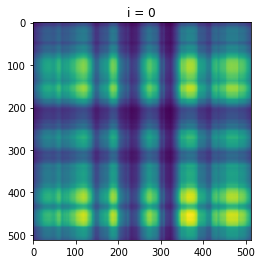

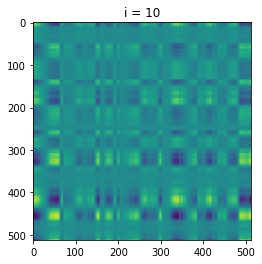

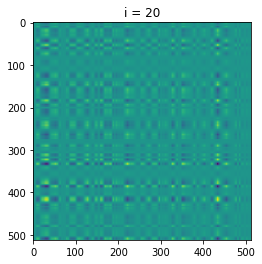

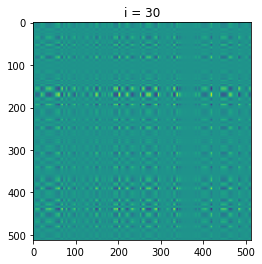

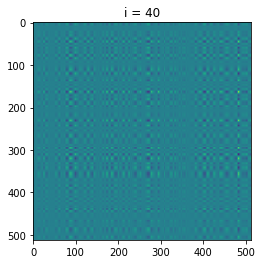

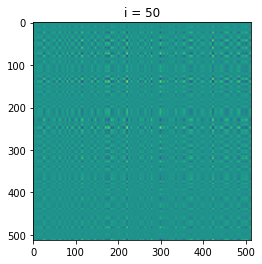

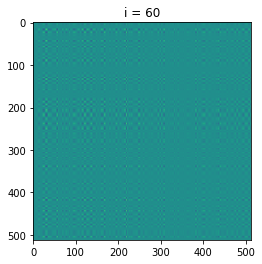

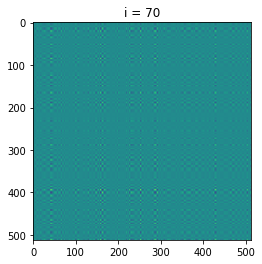

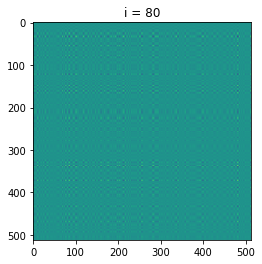

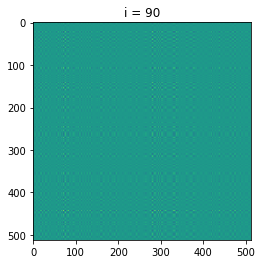

In [22]:
m, n = x.shape
U, s, VT = np.linalg.svd(x, full_matrices=True)
S = np.zeros((m, n))
S[:n, :n] = np.diag(s)

#Visualize some of the dyad σiuivTi of this decomposition:

num = np.arange(0, 100, 10)
for i in num:
    suvt_i = U[:, i:i+1] @ VT[i:i+1, :] * s[i]
    plt.imshow(suvt_i)
    plt.title(f"i = {i}")
    plt.show()

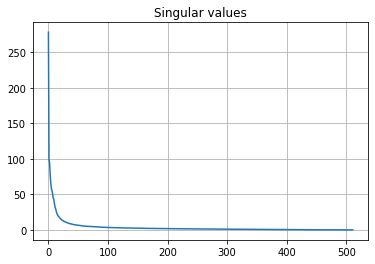

In [23]:
#Plot the singular values of X:

plt.plot(range(0, len(s)), s)
plt.title("Singular values")
plt.grid()
plt.show()

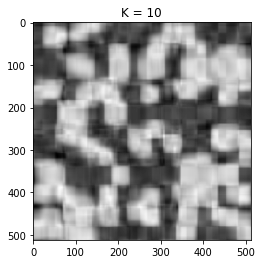

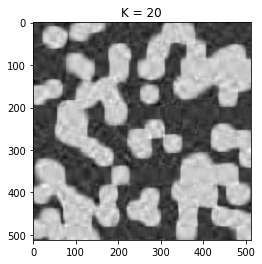

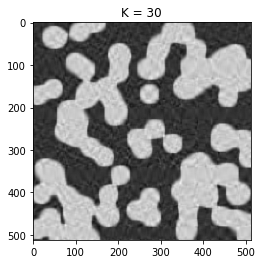

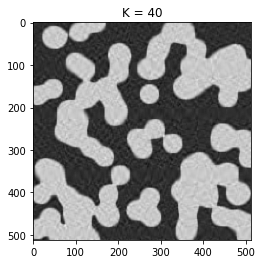

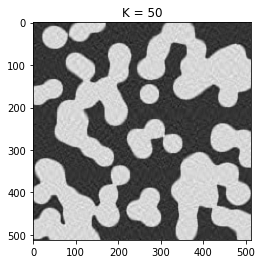

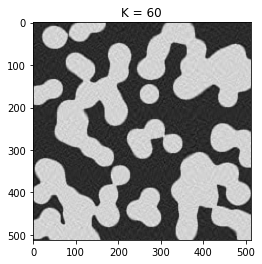

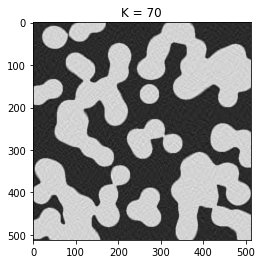

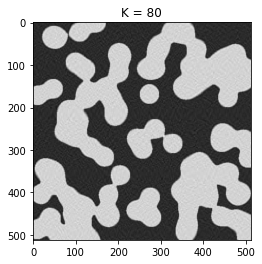

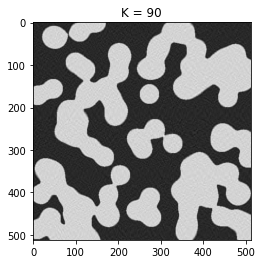

In [24]:
#Visualize the k-rank approximation of X for different values of k.

num = np.arange(10, 100, 10)
for k in num:
    x_k = U[:, :k] @ S[:k, :k] @ VT[:k, :] 
    
    plt.imshow(x_k, cmap="gray")
    plt.title(f"K = {k}")
    plt.show()

N = np.arange(0, 512, 1)
approx_error = []
compression = []
for k in N:
    x_k = U[:, :k] @ S[:k, :k] @ VT[:k, :] 
    
    # Compute the error in Frobenius norm due to the approximation A_k
    approx_error.append(np.linalg.norm(x - x_k, 'fro'))
    
    #Compression factor
    ck = 1 - k*(m+n+1)/(m*n)
    compression.append(ck)

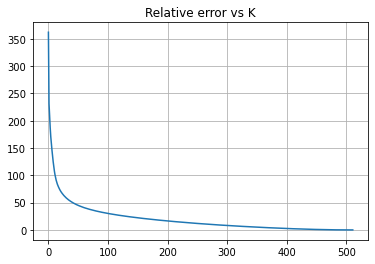

In [25]:
# Compute and plot the approximation error ||X − Xk||F for increasing values of k, 
# where Xk is the k-rank approximation of k

plt.plot(N, approx_error)
plt.title("Relative error vs K")
plt.grid()
plt.show()

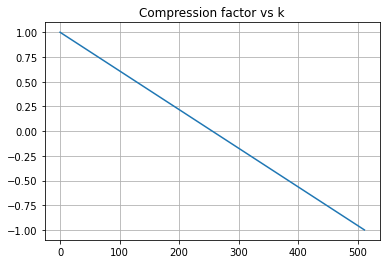

In [26]:
# Plot the compression factor ck =k(m+n+1) / mn for increasing k. What is the approximation error when
# the compressed image requires the same amount of informations of those of the uncompressed image (i.e. ck = 0)? 

plt.plot(N, compression)
plt.title("Compression factor vs k")
plt.grid()
plt.show()